## Random forest

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import numpy as np

housing = pd.read_csv('housing.csv')

housing = pd.get_dummies(housing, drop_first=True)
target = 'median_house_value'
X = housing.copy().drop(target, axis=1)
y = housing[target]


### Concepto total de variables

Árbol normal

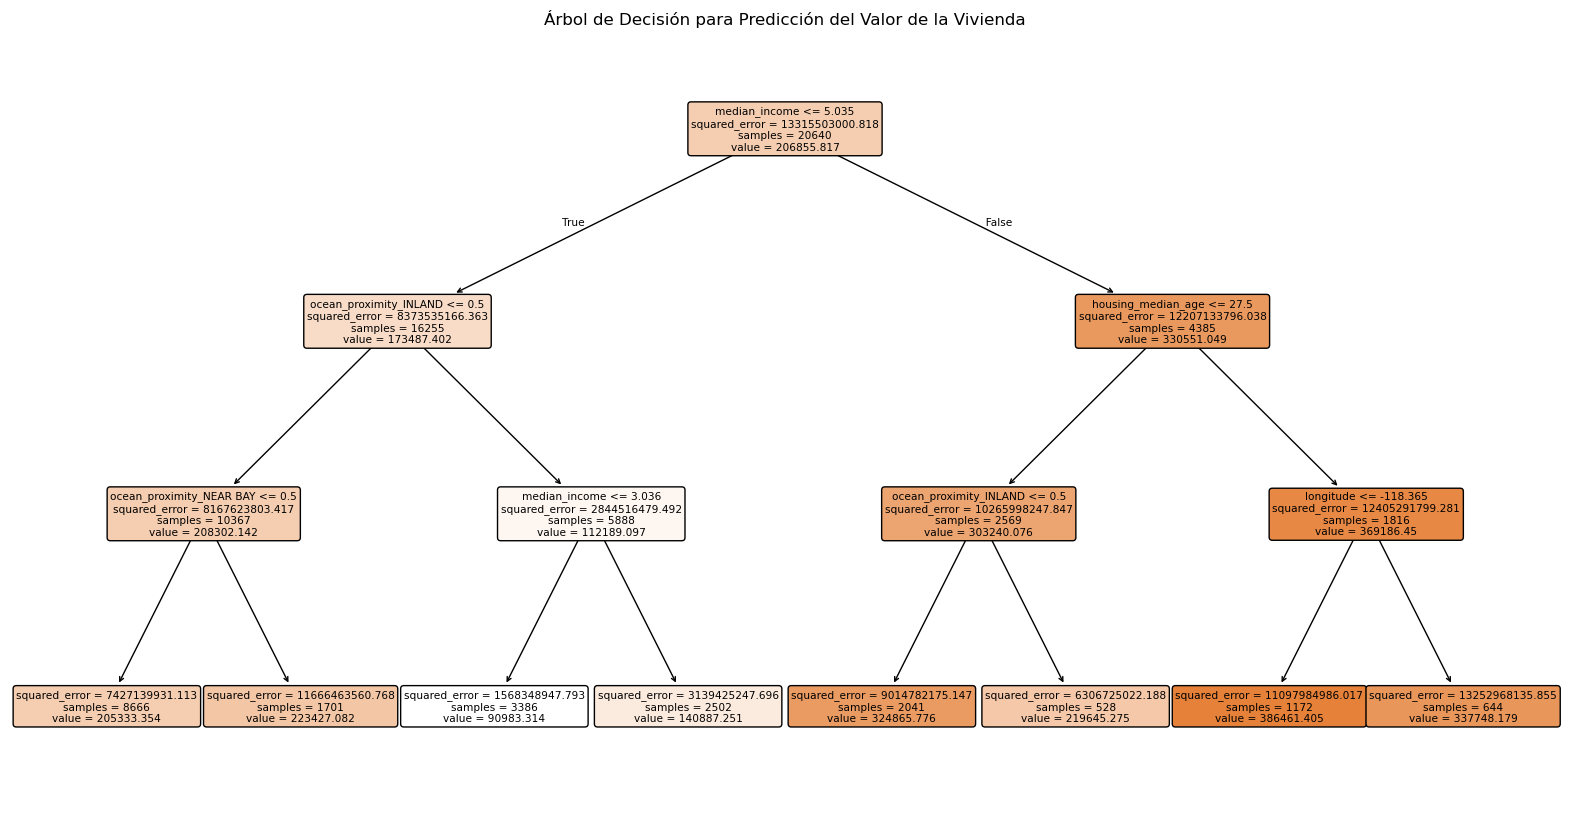

In [5]:
# Train model    
model = DecisionTreeRegressor(max_depth=3, random_state=42, 
                                  max_features='sqrt')
model.fit(X, y)

plt.figure(figsize=(20, 10)) 
plot_tree(model, feature_names=X.keys(), filled=True, rounded=True)
plt.title("Árbol de Decisión para Predicción del Valor de la Vivienda")
plt.show()

### Maximo 3 features

### Maximo 2 features


In [5]:
# Crear y entrenar el modelo de árbol de decisión


In [6]:
# Random int


### Bootstrap tree

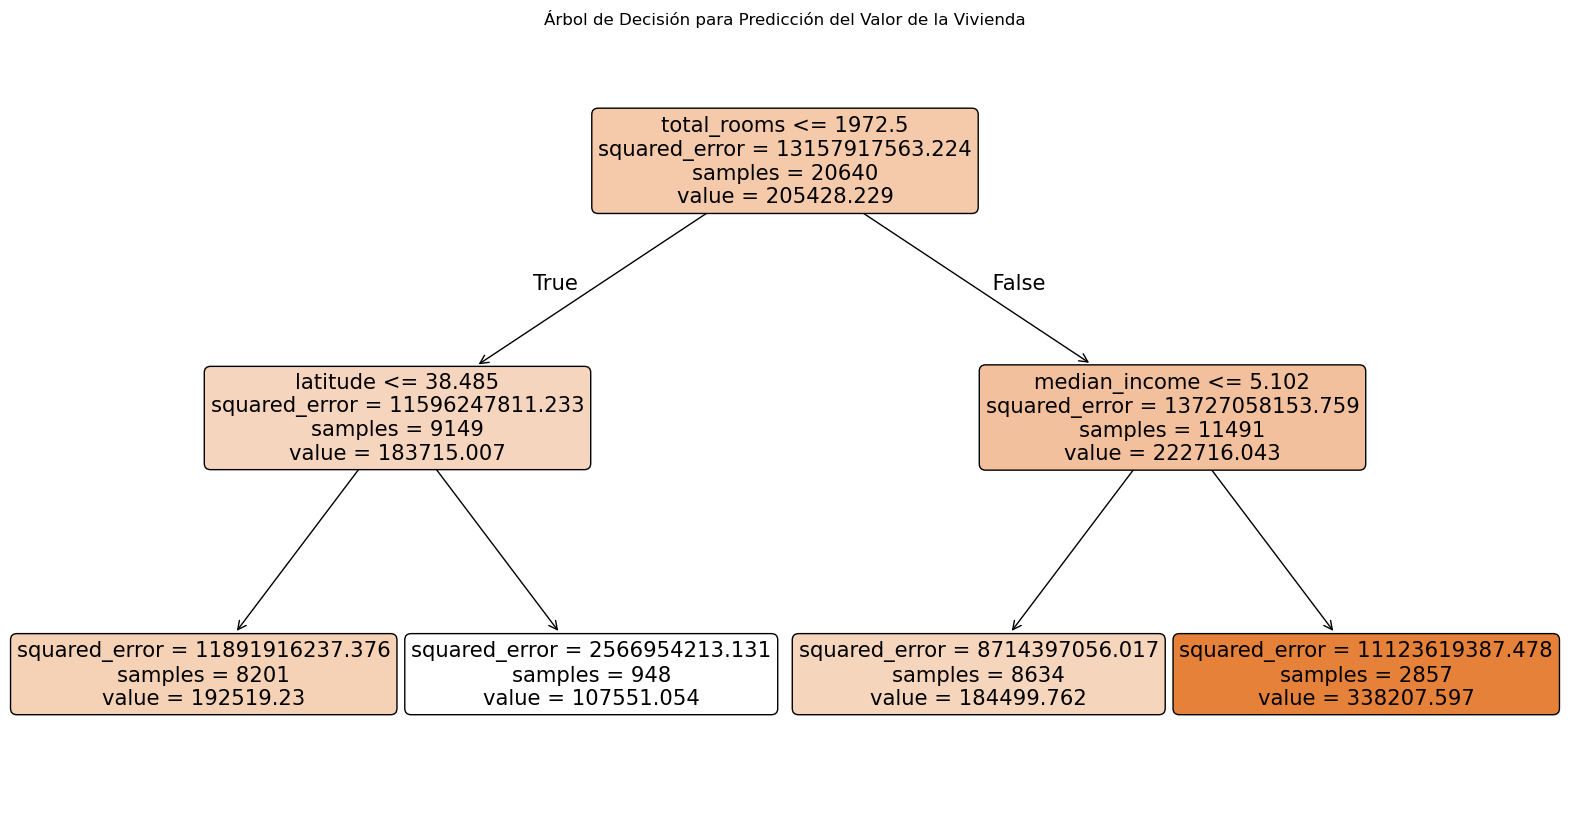

In [9]:
# Crea un bootrap tree, cambia el random_state
# Crear y entrenar el modelo de árbol de decisión

bootstrap_housing = housing.sample(len(housing), replace = True)
X = bootstrap_housing.drop(target, axis = 1)
y = bootstrap_housing[target]

model = DecisionTreeRegressor(max_depth=2, random_state=1, 
                                  max_features='sqrt')
model.fit(X, y)

plt.figure(figsize=(20, 10)) 
plot_tree(model, feature_names=X.keys(), filled=True, rounded=True)
plt.title("Árbol de Decisión para Predicción del Valor de la Vivienda")
plt.show()

### Crea un bosque 

In [12]:
import random
randome_states = np.linspace(1,100,100)

In [29]:
# X train y test
# Dividir en entrenamiento y prueba

test_bootstrap = housing.sample(300)
X_sample = test_bootstrap.drop(target, axis = 1)
y_sample = test_bootstrap[target]

df_predicciones = pd.DataFrame()
for i in range (100):
    bootstrap_housing = housing.sample(len(housing), replace = True)
    X = bootstrap_housing.drop(target, axis = 1)
    y = bootstrap_housing[target]

    model = DecisionTreeRegressor(max_depth=8, random_state = i, 
                                  max_features=len(X_sample.keys()))
    model.fit(X, y)
    
    prediccion = model.predict(X_sample)
    df_predicciones['prediccion_' + str(i)] = prediccion


In [30]:
predicciones_rf = df_predicciones.mean(axis=1)

In [31]:
from sklearn.metrics import r2_score
r2_score(y_pred = predicciones_rf, y_true = y_sample)

0.7364377443163448

### Usando Sklearn

In [32]:
from sklearn.ensemble import RandomForestRegressor

housing = pd.read_csv('housing.csv')
housing = housing.fillna(-1)
housing = pd.get_dummies(housing, drop_first=True)
target = 'median_house_value'
X = housing.copy().drop(target, axis=1)
y = housing[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipelin|e import Pipeline

In [34]:
len(X_train.keys())

12

In [36]:
# Grid search 

pipeline = Pipeline([
    ('rf', RandomForestRegressor(n_estimators=300, n_jobs = -1))
])

params = {
    'rf__max_depth': [8, 10, 15],
    'rf__max_features': ['log2', 'sqrt', 10, 12]
}

rf_grid = GridSearchCV(estimator=pipeline, n_jobs = -1, cv=5, scoring='r2', param_grid=params)
rf_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rf',
                                        RandomForestRegressor(n_estimators=300,
                                                              n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [8, 10, 15],
                         'rf__max_features': ['log2', 'sqrt', 10, 12]},
             scoring='r2')

In [37]:
rf_grid.best_params_

{'rf__max_depth': 15, 'rf__max_features': 10}

In [43]:
best_model =rf_grid.best_estimator_.named_steps['rf']

In [44]:
predicciones_rf = best_model.predict(X_test)

r2_score(y_pred = predicciones_rf, y_true=y_test)

0.8119101774485045

In [46]:
# Comparar con regresion lineal 
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
predicciones = model.predict(X_test)
r2_score(y_pred=predicciones, y_true= y_test)

0.6146061359095156

# Interpretacion del modelo

In [48]:
model_interpretability = pd.DataFrame({
    'variables': X_train.keys(),
    'importancia': best_model.feature_importances_
})
model_interpretability

,variables,importancia
0,longitude,0.104068
1,latitude,0.098176
2,housing_median_age,0.049663
3,total_rooms,0.021988
4,total_bedrooms,0.022298
5,population,0.029672
6,households,0.017523
7,median_income,0.489192
8,ocean_proximity_INLAND,0.157062
9,ocean_proximity_ISLAND,0.000346


## Partial dependence plot


Un Partial Dependence Plot (PDP) muestra la relación entre una o más características y la predicción de un modelo, manteniendo las demás variables fijas. Es útil para entender cómo un modelo como un Random Forest toma decisiones.

fig, ax = plt.subplots(figsize=(8, 5))

PartialDependenceDisplay.from_estimator(best_forest, X_train, [7], ax=ax, feature_names=X_train.keys())


In [53]:
X_train.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

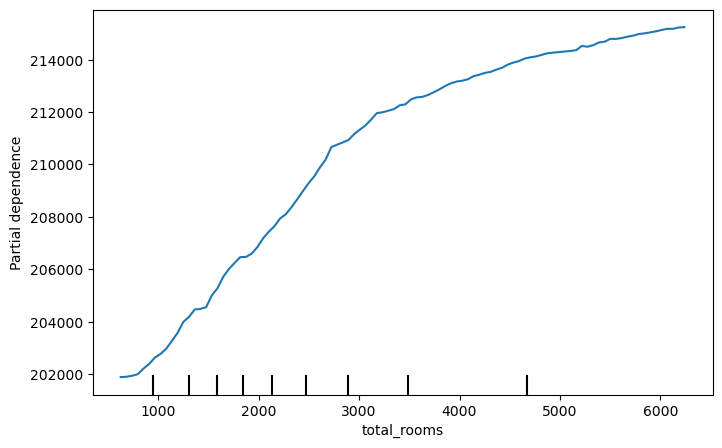

In [54]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(8,5))
PartialDependenceDisplay.from_estimator(best_model, X_train, [3], ax=ax, feature_names=X_train.keys())

#PREGUNTA EXAMEN PARTIAL DEPENDENCE DISPLAY

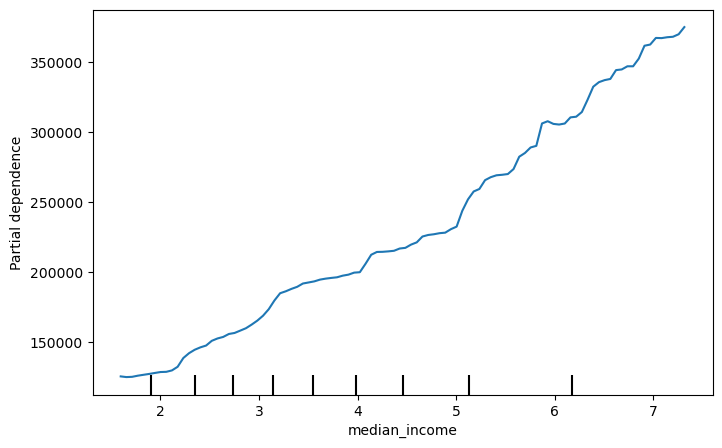

In [55]:
fig, ax = plt.subplots(figsize=(8,5))
PartialDependenceDisplay.from_estimator(best_model, X_train, [7], ax=ax, feature_names=X_train.keys())

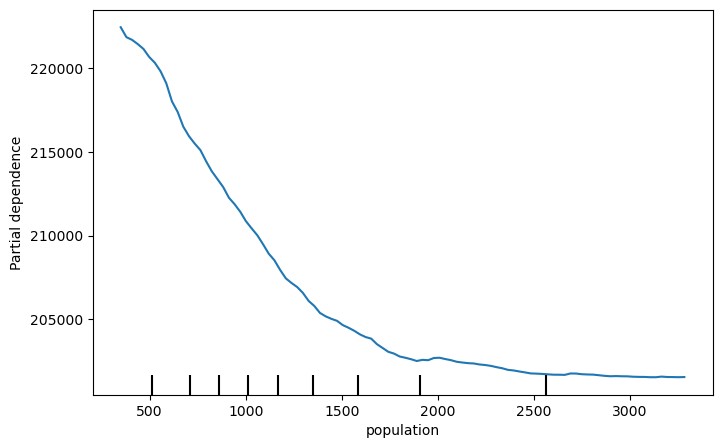

In [57]:
fig, ax = plt.subplots(figsize=(8,5))
PartialDependenceDisplay.from_estimator(best_model, X_train, [5], ax=ax, feature_names=X_train.keys())

### Partial dependence 3D
PartialDependenceDisplay.from_estimator(best_forest, X_train, [(0, 1)], ax=ax, feature_names=X_train.keys())

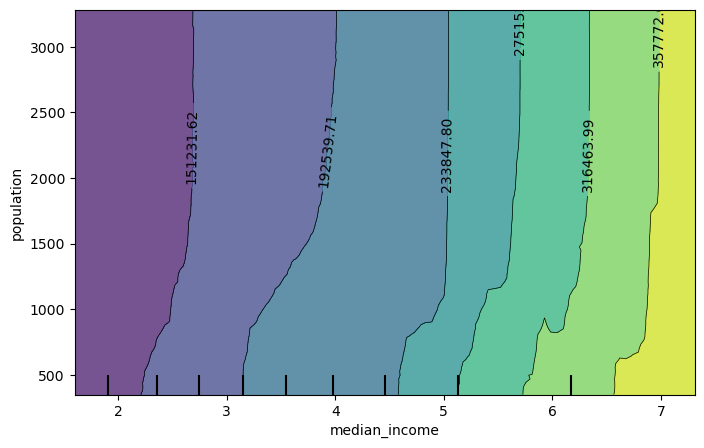

In [60]:
fig, ax = plt.subplots(figsize=(8,5))
PartialDependenceDisplay.from_estimator(best_model, X_train, [(7, 5)], ax=ax, feature_names=X_train.keys())